# Machine Learning Project : Predicting Loan Defaults for P2P lending

In [55]:
# Import Library Necessary for this Project
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from IPython.display import display # this will allow us to perform display() for Dataframe
from pylab import rcParams
import seaborn as sns
# Better Display for Notebooks 
%matplotlib inline
plt.style.use('ggplot')

#Loading the Loan Dataset. This will end up being our Training Dataset
df_2012_2013 = pd.read_csv('2012-2013.csv',skiprows= 1, low_memory= False)
df_2014 = pd.read_csv('2014.csv', skiprows= 1, low_memory= False)
df_2015 = pd.read_csv('2015.csv', skiprows= 1, low_memory= False)
# Appending the two datasets together to prepare our traning dataset

data_train = pd.concat([df_2012_2013, df_2014, df_2015], axis= 0)
print data_train.shape[0]

844905



There are 7 loan statuses : Charged Off, Current, Default, Fully Paid, In Grace Period, Late (16-30 days), Late (31-120 days). We will consider Late (31 -120 days) , Default , Charged Off as a Default loan and Fully-Paid as a desirable loan and ignore everything else.

Statuses before : 
['Fully Paid', 'Charged Off', 'Current', 'Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 'Default']

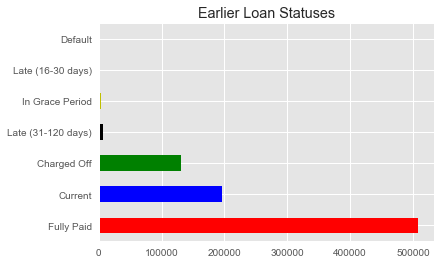

Statuses after : 
['Fully Paid', 'Default']


In [56]:
print "Statuses before : " 
print data_train['loan_status'].unique().tolist()
data_train['loan_status'].value_counts().plot(kind = 'barh', color = 'rbgkymc', title = 'Earlier Loan Statuses')
plt.show()
data_train = data_train.loc[(data_train['loan_status'].isin(['Fully Paid','Charged Off','Late (31-120 days)','Default']))]
data_train['loan_status'] = data_train['loan_status'].apply(lambda x: "Default" if
                                                            x in ['Late (31-120 days)','Charged Off','Default'] else x)

print "Statuses after : " 
print data_train['loan_status'].unique().tolist()

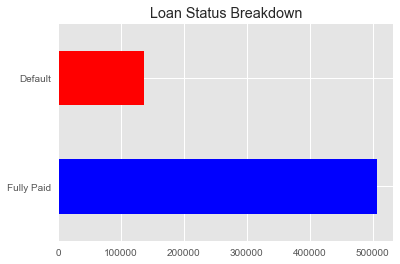

In [57]:
data_train['loan_status'].value_counts().plot(kind = 'barh', color = 'br', title = 'Loan Status Breakdown')
plt.show()

The Data Dictionary provided by the LendingClub does a great job in explaining what every feature means. After some research, I was able to filter our Independent Variables that would not add value to our model. We will being with removing columns with more than 50% missing values. 


In [58]:
data_len = len(data_train)/2 
loan_data = data_train.dropna(thresh= data_len, axis = 1)
loan_data.to_csv('Loan_data.csv', index = False)

In [5]:
loan_data = pd.read_csv('Loan_data.csv', low_memory= False)
loan_data.drop_duplicates()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,14000,14000,14000.0,36 months,12.85%,470.71,B,B4,Assistant Director - Human Resources,4 years,...,100.0,1,0,31840.0,17672.0,3900.0,27340.0,N,Cash,N
1,15000,15000,15000.0,36 months,14.47%,516.10,C,C2,building maint. mgr.,10+ years,...,7.7,0,0,33300.0,13038.0,20800.0,7500.0,N,Cash,N
2,15000,15000,15000.0,36 months,8.90%,476.30,A,A5,aircraft maintenance engineer,2 years,...,66.7,0,0,288195.0,39448.0,14200.0,33895.0,N,Cash,N
3,10000,10000,10000.0,36 months,9.67%,321.13,B,B1,Registered Nurse,7 years,...,66.7,0,0,58486.0,39143.0,9200.0,36186.0,N,Cash,N
4,20800,20800,20800.0,36 months,13.53%,706.16,B,B5,Operations Manager,10+ years,...,50.0,0,0,43100.0,23473.0,15000.0,0.0,N,Cash,N
5,27050,27050,27050.0,36 months,10.99%,885.46,B,B2,Team Leadern Customer Ops & Systems,10+ years,...,25.0,0,0,138554.0,70186.0,35700.0,33054.0,N,Cash,N
6,9750,9750,9750.0,36 months,13.98%,333.14,C,C1,Medical Assistant,1 year,...,66.7,0,0,21314.0,14123.0,7200.0,6214.0,N,Cash,N
7,3000,3000,3000.0,36 months,12.85%,100.87,B,B4,Auditor,10+ years,...,66.7,2,0,32082.0,19530.0,4300.0,26782.0,N,Cash,N
8,12000,12000,12000.0,36 months,13.53%,407.40,B,B5,On road manager,10+ years,...,33.3,0,0,18130.0,13605.0,7000.0,10030.0,N,Cash,N
9,7550,7550,7550.0,36 months,16.24%,266.34,C,C5,Special Order Fulfillment Clerk,3 years,...,100.0,0,0,8000.0,5759.0,4000.0,0.0,N,Cash,N


As we can see we have a lot of columns to deal with in this dataset. We will now explore the data dictionary as this will be useful to clean the data. This part is crucial in order to understand the data and avoid error while fitting our machine learning model later on.

In [6]:
# Let us see how many columns we have
print loan_data.shape[1]
loan_data_columns = loan_data.columns


87


We will see if we have description for all the 87 columns that we have. We will get rid of the columns for which we dont. 

In [7]:
data_dict = pd.read_excel('LCDataDictionary.xlsx')
data_dict_col = data_dict['LoanStatNew'].tolist()
print set(loan_data_columns) - set(data_dict_col)
difference = list(set(loan_data_columns).intersection(set(data_dict_col)))
loan_data  = loan_data[difference]
data_dict['Flag'] = data_dict.apply(lambda x: "Yes" if x['LoanStatNew'] in loan_data_columns else "No", axis = 1)
data_dict = data_dict[data_dict['Flag'] == "Yes"][['LoanStatNew','Description']]


set(['debt_settlement_flag', 'disbursement_method', 'hardship_flag', 'total_rev_hi_lim'])


# Getting Rid of features : 
### (this was probably the toughest/ longest step in the entire model building)
####Here we will get rid of funded_amnt_inv, emp_title, sub_grade (as it is already present in grade), zip_code (we already have the state), collection_recovery_fee, id, installment, last credit pull_dt, out_principal, total_payment, total_payment_inv, out_principal_inv, recoveries, total recoveries_prncp (because they all provide us with future imfomration, which we dont want), collection recovery fee etc.

In [8]:
discard_cols = ['funded_amnt','funded_amnt_inv','sub_grade','emp_title','issue_d','zip_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt']
loan_data = loan_data.drop(discard_cols, axis =1)

In [9]:
len(loan_data.columns)


66

## We can see that we have 66 features now. Let us do some further Data Exploration to find out the breakdown of Loan Status' amongst various grades.

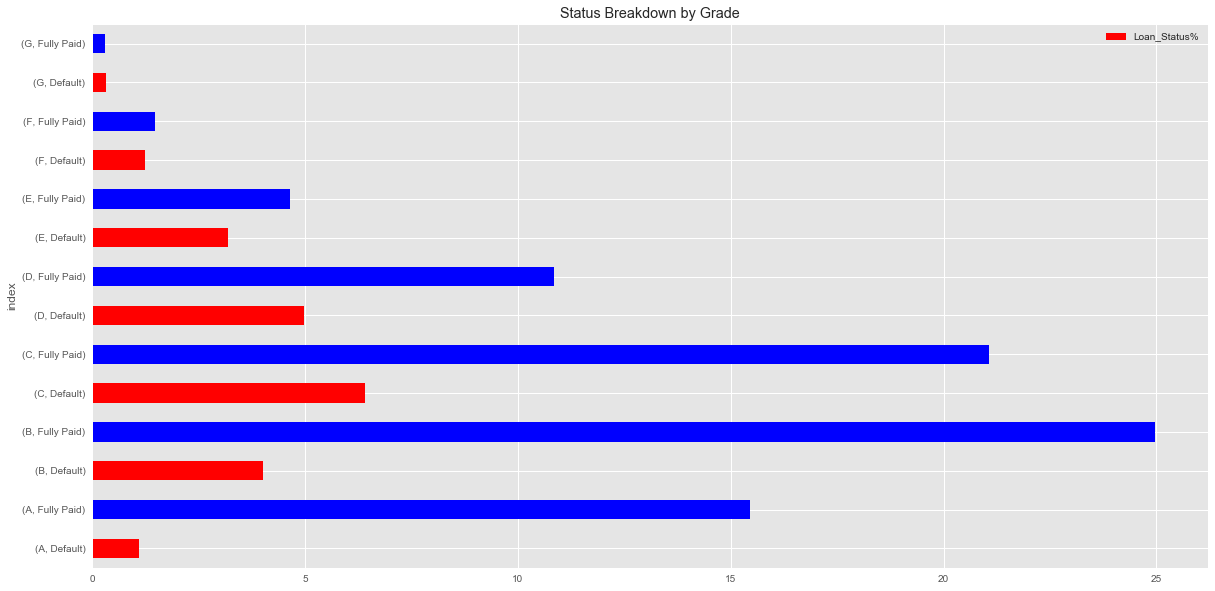

In [10]:
df_default = loan_data.groupby(['grade','loan_status']).agg({'loan_status' :'count'}).rename(columns = {'loan_status' : 'Loan Status Breakdown'})
df_default['Loan_Status%'] = (df_default['Loan Status Breakdown']/loan_data.shape[0]) * 100
df_default_sum = pd.DataFrame(df_default.sum(axis= 0)).T
df_default = df_default.append(df_default_sum).reset_index()
df_default.iloc[-1,0] = 'Total'
df_default
rcParams['figure.figsize'] = 20,10
df_default.iloc[:-1,].plot('index','Loan_Status%', kind = 'barh',color = 'rb', title = 'Status Breakdown by Grade')

In [11]:
loan_data['loan_status'].value_counts()


Fully Paid    507448
Default       136824
Name: loan_status, dtype: int64

### We need to filter out all the columns that only have single values as they don't provide much information.(Single value columns/ 0 variance columns)
#### (In R, after we look at the distributions of columns that have less that 50% missing values (and the distribution is fairly normal) , we can fill them up with the median value. We store medial_impute_model for further use. )

In [12]:
orig_columns = loan_data.columns
drop_columns = []
for col in orig_columns:
    col_series = loan_data[col].dropna().unique().tolist()
    if len(col_series) == 1:
        drop_columns.append(col)
print drop_columns
loan_data = loan_data.drop(drop_columns, axis = 1)

['policy_code']


### Preparing the features : Dealing with missing Values (less that 50%) 



In [13]:
total_count = loan_data.shape[0]
null_count = loan_data.isnull().sum().sort_values(ascending= False)
percent_na = null_count/total_count * 100
percent_na = percent_na[percent_na > 0]
percent_na

mths_since_recent_inq         10.642710
mo_sin_old_il_acct             7.333549
num_tl_120dpd_2m               7.297073
pct_tl_nvr_dlq                 4.327675
avg_cur_bal                    4.307653
mo_sin_old_rev_tl_op           4.305945
mo_sin_rcnt_rev_tl_op          4.305945
num_rev_accts                  4.305945
num_il_tl                      4.305790
num_bc_tl                      4.305790
num_rev_tl_bal_gt_0            4.305790
num_op_rev_tl                  4.305790
total_il_high_credit_limit     4.305790
num_tl_30dpd                   4.305790
num_accts_ever_120_pd          4.305790
mo_sin_rcnt_tl                 4.305790
num_tl_90g_dpd_24m             4.305790
tot_coll_amt                   4.305790
num_tl_op_past_12m             4.305790
num_actv_bc_tl                 4.305790
tot_hi_cred_lim                4.305790
tot_cur_bal                    4.305790
num_actv_rev_tl                4.305790
num_sats                       2.491960
num_bc_sats                    2.491960


#### We see that there are still 36 columns that have na values. Instead of getting rid of entire columns we can either fill them up with a random value (mostly it is the median) , or we can simply delete the rows!
#### We will delete the rows

In [14]:
loan_data = loan_data.dropna(axis = 0)
loan_data.shape


(518246, 65)

### Dealing with High Correlation (Multicolinearity)

#### The way we will deal with this is that we will remove the column which leads to an overall reduction in Correlation. (In R this can be done easily using the findCorrelation function)

In [15]:
import numpy as np
corrMatrix = loan_data.corr(method = 'pearson')
corrMatrix.loc[:,:] = np.tril(corrMatrix , k =-1)
already_in = set()
result = []

In [46]:
for col in corrMatrix.columns:
    perfect_corr=  corrMatrix[col][corrMatrix[col] > 0.85].index.tolist()
    if perfect_corr and col not in already_in:
        already_in.update(set(perfect_corr))
        perfect_corr.append(col)
        result.append(perfect_corr)
                
select_nested = [f[1:] for f in result]
select_flat = [i for j in select_nested for i in j]
print len(set(select_flat))
# for cor in corrMatrix.columns:
#     print "For %s"%str(cor)
#     perfect_corr = corrMatrix[col][corrMatrix[col] > 0.5].index.tolist()
#     # perfect_corr = corrMatrix[col][corrMatrix[col] == 0].index.tolist()
#     print perfect_corr

loan_data_2 = loan_data.drop(select_flat, axis =1 )

22


In [47]:
print len(loan_data.columns)
print len(loan_data_2.columns)

79


In [52]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# loan_data_2 = add_constant(loan_data)
# x = pd.Series([variance_inflation_factor(loan_data_2.values,i) for i in range(loan_data_2.shape[1])], index= loan_data_2.columns)


In [53]:
# print x[x > 10.0]

tot_cur_bal                             47.481304
total_acc                              341.600863
num_sats                               680.386577
num_il_tl                              129.170100
total_il_high_credit_limit              17.667755
installment                             59.516445
num_actv_bc_tl                          10.257143
total_bc_limit                          10.188016
open_acc                               684.147199
num_rev_tl_bal_gt_0                    413.101370
total_bal_ex_mort                       22.615900
num_bc_sats                             14.151610
mort_acc                                12.752337
num_op_rev_tl                           18.363981
num_actv_rev_tl                        413.655071
num_rev_accts                          171.650680
tot_hi_cred_lim                         44.484723
loan_amnt                               69.706955
home_ownership_ANY                            inf
home_ownership_MORTGAGE                       inf


###Now that we have excluded all rows that had empty values. We will see how many non-numeric data types we have. 

In [19]:
print (loan_data.dtypes.value_counts())
print (loan_data_2.dtypes.value_counts())

float64    36
object     16
int64      13
dtype: int64

### Looks like we have 16 objects that we need to address, let us explote them 

In [20]:
object_columns = loan_data.select_dtypes(include= ["object"])
print object_columns.iloc[0]

grade                                   C
emp_length                      10+ years
loan_status                    Fully Paid
title                             pay off
initial_list_status                     f
earliest_cr_line                   Jul-92
application_type               Individual
verification_status          Not Verified
pymnt_plan                              n
purpose                debt_consolidation
addr_state                             NY
last_credit_pull_d                 Feb-18
term                            36 months
revol_util                         22.30%
int_rate                           14.47%
home_ownership                       RENT
Name: 1, dtype: object



i)    Grade is Categorical
ii)   Emp_length is the employment length in years. It can range from 0 to 10 or 10+
iii)  Loan_Status needs to converted to 0(Default)/1(Fully Paid)
iv)   Title is the reason why the borrower took the loan out and can take many values. This is replicated in purpose so we can drop title
v)    Initial List Status can only take two values - w,f
vi)   

In [21]:
## NOTE: CHANGING OUR TARGET COLUMN TO A NUMERICAL COLUMN ##    
print loan_data['loan_status'].value_counts()
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: 1 if x == "Fully Paid" else 0)
print loan_data['loan_status'].value_counts()

Fully Paid    405128
Default       113118
Name: loan_status, dtype: int64


1    405128
0    113118
Name: loan_status, dtype: int64


In [22]:
cols = ['term','emp_length','home_ownership','verification_status','addr_state']
for col in cols:
    print "***col***"
    print loan_data[col].value_counts()

***col***
 36 months    385042
 60 months    133204
Name: term, dtype: int64
***col***
10+ years    170811
2 years       46240
3 years       40973
< 1 year      40103
1 year        33189
5 years       32292
4 years       30022
7 years       27231
8 years       26421
6 years       25783
n/a           24710
9 years       20471
Name: emp_length, dtype: int64
***col***
MORTGAGE    269501
RENT        199147
OWN          49531
OTHER           37
NONE            29
ANY              1
Name: home_ownership, dtype: int64
***col***


Source Verified    194752
Verified           172287
Not Verified       151207
Name: verification_status, dtype: int64
***col***
CA    75522
TX    43277
NY    39811
FL    35400
IL    20813
NJ    18867
PA    18521
OH    17530
GA    16690
VA    14897
NC    14493
MI    14158
AZ    12527
MD    12022
MA    11751
WA    11563
CO    10017
MN     9348
IN     9036
MO     8498
TN     8011
NV     7790
CT     7470
WI     7001
AL     6656
OR     6413
LA     6130
SC     5912
KY     5183
OK     4989
KS     4716
AR     4118
UT     3978
NM     3002
HI     2655
NH     2538
WV     2523
RI     2253
MS     2143
MT     1572
DE     1480
AK     1376
DC     1267
WY     1264
SD     1115
VT     1026
NE      519
ND      201
ME      201
ID        2
IA        1
Name: addr_state, dtype: int64


#### The previous 5 columns contains some categorical variable, we will have to encode them as dummy variable for our model. We will remove add_state because it will increase the size of our Dataframe if we encode it.


In [23]:
# This will reduce our counts for object data types to 14 (Loan_Status amd Addr_State will be gone)
loan_data = loan_data.drop('addr_state',axis = 1)
# Moving on to the remaining 14 columns 

In [24]:
print loan_data['purpose'].value_counts()
print"****"
print loan_data['title'].value_counts()


debt_consolidation    315934
credit_card           117440
home_improvement       30055
other                  23124
major_purchase          8934
small_business          5014
medical                 4775
car                     4168
moving                  2975
vacation                2693
house                   2140
wedding                  704
renewable_energy         289
educational                1
Name: purpose, dtype: int64
****
Debt consolidation                      252642
Credit card refinancing                  92113
Home improvement                         24136
Other                                    19084
Debt Consolidation                        9331
Major purchase                            7181
Business                                  4264
Medical expenses                          4100
Consolidation                             3621
Car financing                             3301
debt consolidation                        3005
Moving and relocation                     24

In [25]:
loan_data = loan_data.drop('title',axis = 1)
# We will also drop the Date columns like Last Credit Pull and Earliest Credit Line

In [26]:
loan_data = loan_data.drop(['last_credit_pull_d','earliest_cr_line'], axis = 1)

In [27]:
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip("%").astype('float')
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip("%").astype('float')

In [28]:
# Let us also categorize our Emp_Length variable while we are at it!!
mapping_dict= {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}
loan_data = loan_data.replace(mapping_dict)
# We will be down to 8 Object Type

In [29]:
print loan_data.select_dtypes(include = ['object']).iloc[0]
# Since we are already capturing the Grade in our 'intrate' column (indirectly) we will get rid of that too!!

grade                                   C
initial_list_status                     f
application_type               Individual
verification_status          Not Verified
pymnt_plan                              n
purpose                debt_consolidation
term                            36 months
home_ownership                       RENT
Name: 1, dtype: object


In [30]:
loan_data = loan_data.drop('grade',axis = 1)

In [31]:
print loan_data.select_dtypes(include = ['object']).iloc[0]

initial_list_status                     f
application_type               Individual
verification_status          Not Verified
pymnt_plan                              n
purpose                debt_consolidation
term                            36 months
home_ownership                       RENT
Name: 1, dtype: object


In [32]:
categorical_columns = ['home_ownership','verification_status','emp_length', 'purpose','term']
dummy_df = pd.get_dummies(loan_data[categorical_columns])
loan_data = pd.concat([loan_data, dummy_df], axis  = 1)
loan_data = loan_data.drop(categorical_columns , axis = 1)

In [33]:
col = loan_data.select_dtypes(include = ['object']).iloc[0]
print col

#### Let us see what is up with these three columns : initial_list_status, application_type and pymnt_plan

In [34]:
for col in ['initial_list_status','application_type','pymnt_plan']:
    print col.upper()
    print loan_data[col].value_counts()
    print "****"

INITIAL_LIST_STATUS
f    269641
w    248605
Name: initial_list_status, dtype: int64
****
APPLICATION_TYPE
Individual    518028
Joint App        218
Name: application_type, dtype: int64
****
PYMNT_PLAN
n    518084
y       162
Name: pymnt_plan, dtype: int64
****


#### This is interesting, we will be categorising the Initial_List_Status as the breakdown is almost even.
#### We will go ahead and drop the application_type and pymnt_plan as they dont offer a lot of variance.

In [35]:
loan_data = pd.concat([loan_data, pd.get_dummies(loan_data['initial_list_status'])], axis = 1)
loan_data = loan_data.drop(['application_type','pymnt_plan','initial_list_status'], axis = 1)

In [36]:
print loan_data.dtypes.value_counts()

float64    38
uint8      27
int64      14
dtype: int64


In [37]:
# Cleaned and Filtered Data to CSV
loan_data.to_csv('clean_loan_data.csv',index = False)

In [38]:
print loan_data.shape

(518246, 79)


## Model Evaluation and Validation

### Machine Learning Algorithm Fitting